In [1]:
#신경망 구현
#1.초기화(입력,은닉,출력 노드의 수)
#2.학습(가중치 업데이트)
#3.질의(입력 -> 연산 -> 출력 노드에 전달)

In [1]:
import scipy.special
import numpy as np

In [2]:
class neuralNetwork:
    #신경망 초기화 기능
    def __init__(self, input_nodes,hidden_nodes,output_nodes,learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
#가중치는 행렬로 표현
#입력/은닉 가중치 행렬 형식: (은닉노드 * 입력노드)
#은닉/출력 가중치 행렬 형식: (출력노드 * 은닉노드)

#입력,은닉 계층 사이의 가중치 행렬
        #normal(평균,표준편차,개수)
        self.wih = np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
#은닉,출력 계층 사이의 가중치 행렬
        self.who = np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        self.activation_function = lambda x:scipy.special.expit(x) #sigmoid
        
    #신경망 학습 기능(2단계)
    #1단계(forward propagation: 입력 데이터에 대해 계산(query)
    #2단계(backward propagation: 예측값과 실제값의 차이를 계산 -> 가중치 업데이트

    def train(self, inputs_list,targets_list):
        inputs = np.array(inputs_list, ndmin=2).T        
        targets = np.array(targets_list, ndmin=2).T        
  
        #은닉계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        #은닉계층에서 나가는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        #출력계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        #출력계층에서 나가는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        
        #오차=실제값-예측값
        output_errors = targets-final_outputs
        
        #은닉 계층 노드에 대한 역전파된 오차
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합하여 계산
        hidden_errors = np.dot(self.who.T, output_errors)
        #은닉 계층과 출력 계층 간의 가중치 업데이트(who)
        self.who += self.lr*  np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        self.wih += self.lr*  np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))

        
    
    
    
    #신경망 질의 기능: 신경망으로 들어오는 입력을 받아 출력을 반환
    def query(self, inputs_list):
        #입력 리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T        
        #은닉계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        #은닉계층에서 나가는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        #출력계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        #출력계층에서 나가는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [3]:
np.array([1,2,3])
np.array([1,2,3.0])
np.array([[1,2],[3,4]])
np.array([1,2,3], ndmin=2)

array([[1, 2, 3]])

In [38]:
#입력, 은닉, 출력 노드 수
input_nodes=3
hidden_nodes=3
output_nodes=3
#학습률(learning rate)
learning_rate = 0.3

#신경망 클래스 객체를 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
n.query([1.0,0.5,-1.5])

array([[0.53199526],
       [0.34929373],
       [0.81885039]])

In [14]:
#가중치 행렬 만들기

#난수 발생
# np.random.rand(3,3)-0.5

#정류분포를 따르는 난수함수
np.random.normal(self.hnodes)

0.19500399077947336

In [17]:
pow(3,2)  #3의 2제곱
3**2
pow(9,-0.5)

0.3333333333333333

In [4]:
data_file = open("mnist_train_100.csv","r")
data_list = data_file.readlines()
len(data_list) #길이:100
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
import matplotlib.pyplot as plt

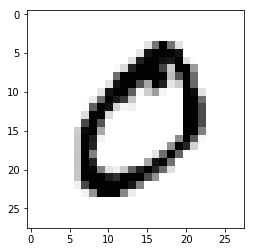

In [6]:
all_values = data_list[1].split(",")
#type(all_values) #784->array(28,28)
image_array = np.asfarray(all_values[1:]).reshape((28,28))
#asfarray: 문자로 된 숫자 -> 실수로 변환
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [7]:
# 0~255 -> 0.0~1.0 
# (0~255)/255=>0~1*0.99 => 0~0.99+0.01=>0.01~1.0
scaled_input = (np.asfarray(all_values[1:])/255*0.99)+0.01

In [8]:
onodes=10 #출력 노드 종류가 10가지
targets = np.zeros(onodes)+0.01
targets[int(all_values[0])] = 0.99

In [10]:
#입력, 은닉, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10 #0~9

#학습률=0.3
learning_rate=0.3

#신경망 객체 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

#mnist 트레이닝 데이터 불러오기
training_data_file = open("mnist_train_100.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs=10
for e in range(epochs):
    
    #신경망 학습 
    for record in training_data_list:
        all_values = record.split(",")
        inputs = (np.asfarray(all_values[1:])/255*0.99)+0.01
        #0.01~1.0으로 스케일링
        #결과값 생성
        targets = np.zeros(output_nodes)+0.01    #0이 10개 들어있는 array 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [11]:
test_data_file = open("mnist_test_10.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

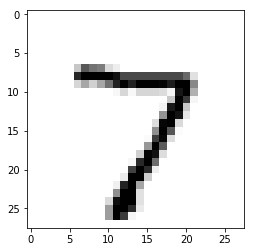

In [12]:
all_values = test_data_list[0].split(",")
all_values[0] #첫번째 테스트 데이터 정답:7

image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys')

In [13]:
scorecard=[]
for record in test_data_list:
    all_values = record.split(",")
    #정답
    correct_label = int(all_values[0])
    print(correct_label, ": correct_label")
    
    outputs = n.query((np.asfarray(all_values[1:])/255*0.99)+0.01)
    label = np.argmax(outputs)
    print(label,":my network's answer")
    
    if (label==correct_label) :
        scorecard.append(1)
    else:
        scorecard.append(0)
scorecard_array = np.asarray(scorecard)
print(scorecard_array.sum()/scorecard_array.size)

7 : correct_label
7 :my network's answer
2 : correct_label
2 :my network's answer
1 : correct_label
1 :my network's answer
0 : correct_label
0 :my network's answer
4 : correct_label
4 :my network's answer
1 : correct_label
1 :my network's answer
4 : correct_label
9 :my network's answer
9 : correct_label
4 :my network's answer
5 : correct_label
4 :my network's answer
9 : correct_label
9 :my network's answer
0.7


In [14]:
test_data_file = open("mnist-in-csv/mnist_test.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [29]:
all_values = test_data_list[1].split(",")
test_data_list[1]

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

In [35]:
from tqdm import tqdm_notebook

In [37]:
#입력, 은닉, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10 #0~9

#학습률=0.3
learning_rate=0.3

#신경망 객체 생성
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

#mnist 트레이닝 데이터 불러오기
training_data_file = open("mnist-in-csv/mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

accuracy=[]
epochs=10
for e in tqdm_notebook(range(epochs)):
    
    #신경망 학습 
    for record in tqdm_notebook(training_data_list[1:]):
        all_values = record.split(",")
        inputs = (np.asfarray(all_values[1:])/255*0.99)+0.01
        #0.01~1.0으로 스케일링
        #결과값 생성
        targets = np.zeros(output_nodes)+0.01    #0이 10개 들어있는 array 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
    
    
    scorecard=[]
    for record in tqdm_notebook(test_data_list[1:]):
        all_values = record.split(",")
        #정답
        correct_label = int(all_values[0])
#         print(correct_label, ": correct_label")

        outputs = n.query((np.asfarray(all_values[1:])/255*0.99)+0.01)
        label = np.argmax(outputs)
#         print(label,":my network's answer")

        if (label==correct_label) :
            scorecard.append(1)
        else:
            scorecard.append(0)
    scorecard_array = np.asarray(scorecard)
    res = scorecard_array.sum()/scorecard_array.size
    accuracy.append(res)
print(accuracy)



[0.9433, 0.9468, 0.9476, 0.9502, 0.9475, 0.9465, 0.9469, 0.9509, 0.9459, 0.9489]


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
df = pd.DataFrame(accuracy)
# accuracies.rename(columns=)
df.columns = ['accuracy']

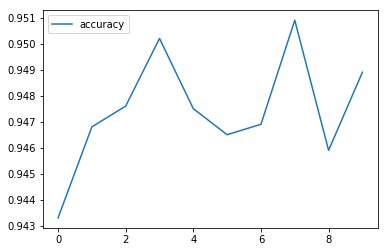

In [70]:
sns.lineplot(data=df )